In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import contextily as cx

%matplotlib inline

In [18]:
rm_comunas = gpd.read_file('../Chile/Censo/R13/COMUNA_C17.shp')

In [23]:
rm_comunas.to_crs(4326, inplace=True)

#### Street Score defined as street length average divided by streets per node

In [21]:
def score_streets(gdf):
    out=gpd.GeoDataFrame()
    i=1
    for index, row in gdf.iterrows():
        try:
            clear_output(wait=True)
            g=ox.graph_from_polygon(row['geometry'],network_type='walk')
            stats=ox.stats.basic_stats(g)
            row['street_score']=stats['street_length_avg']/stats['streets_per_node_avg']
            print('{}% complete'.format(round(((i/len(gdf))*100),2)))
            ox.plot_graph(g,node_size=0)
            out=out.append(row)
            i+=1
        except:
            continue
    return out

#### Create a new geodataframe with the street score input from the above gdf

In [29]:
out=gpd.GeoDataFrame()
for index, row in rm_comunas.iterrows():
    #clear_output(wait=True)
    g=ox.graph_from_polygon(row['geometry'],network_type='walk')
    stats=ox.stats.basic_stats(g)
    row['street_score']=stats['street_length_avg']/stats['streets_per_node_avg']
    out=out.append(row)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_2300\99350845.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out=out.append(row)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2300\99350845.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out=out.append(row)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2300\99350845.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out=out.append(row)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2300\99350845.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out=out.append(row)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_2300\99350845.py:7: FutureWarning: The frame.append method is deprecated and wil

In [35]:
gdf = out.set_geometry("geometry")

In [48]:
rm_comunas['coords'] = rm_comunas['geometry'].apply(lambda x: x.representative_point().coords[:])
rm_comunas['coords'] = [coords[0] for coords in rm_comunas['coords']]

In [49]:
comunas = rm_comunas.set_index('NOM_COMUNA')
comunas_sel = comunas.drop(['PEDRO AGUIRRE CERDA','PROVIDENCIA','QUINTA NORMAL',
                            'ÑUÑOA','LA GRANJA','LA CISTERNA','SAN MIGUEL','MACUL'])
comunas_sel.reset_index(inplace=True)

#### Street Score Choropleth

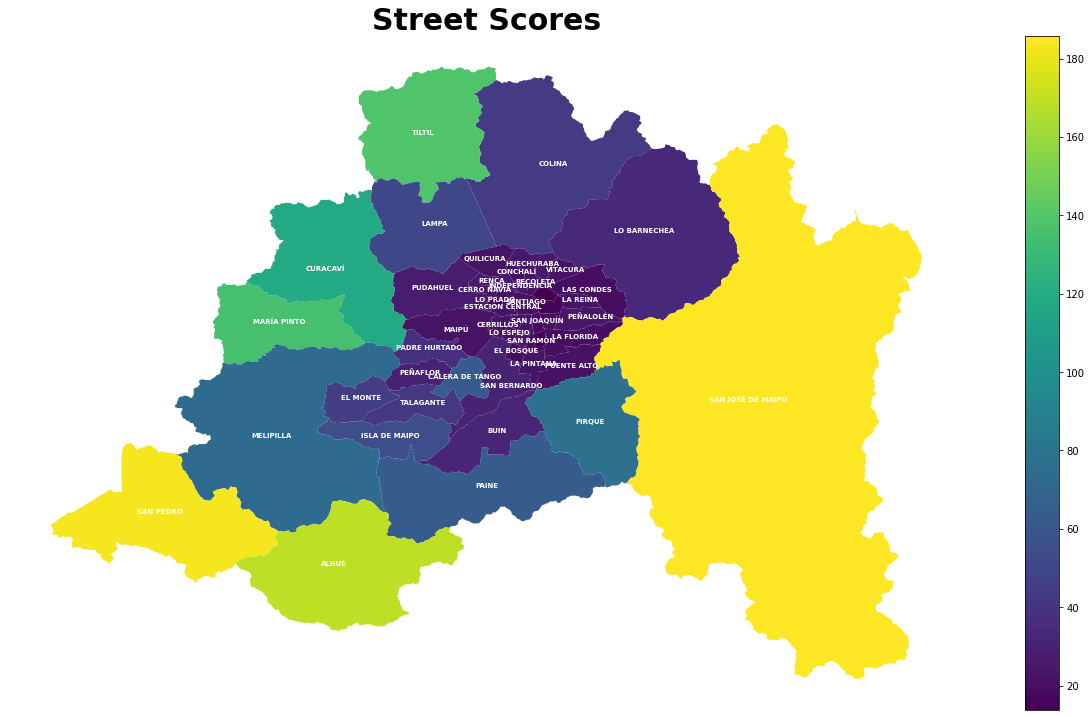

In [58]:
fig, ax = plt.subplots(figsize=(17,10))
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_title('Street Scores', fontsize=30, fontweight='bold')

gdf.plot(column='street_score',legend=True, ax=ax, cmap='viridis')
texts = [ax.text(row.coords[0], row.coords[1], s=row['NOM_COMUNA'], horizontalalignment='center', color='white', weight='bold', fontsize=7,
                bbox={'facecolor': 'none', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'}) for idx, row in comunas_sel.iterrows()]

plt.savefig('../Chile/StreetScore/rm_street_score.png', dpi=400, bbox_inches='tight')
plt.tight_layout()